In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mean_filter(image, kernel_size):
    window_size = kernel_size
    edge = window_size // 2
    padded_image = np.pad(image, edge, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+window_size, j:j+window_size]
            mean_value = np.mean(window)
            filtered_image[i, j] = mean_value
    
    return filtered_image


In [3]:
def median_filter(image, kernel_size):
    window_size = kernel_size
    edge = window_size // 2
    padded_image = np.pad(image, edge, mode="constant", constant_values=0)
    new_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+window_size, j:j+window_size]
            median = np.median(window)
            new_image[i, j] = median

    return new_image

In [6]:
import math

def gaussian_kernel(kernel_size, sigma=1):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float64)
    center = kernel_size // 2
    sum_val = 0
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            diff = (i - center) ** 2 + (j - center) ** 2
            kernel[i, j] = math.exp(-diff / (2 * sigma ** 2))
            sum_val += kernel[i, j]
    
    # 正規化高斯核，使其所有值加總為1
    kernel /= sum_val
    
    return kernel

def gaussian_filter(image, kernel_size, sigma=1):
    kernel = gaussian_kernel(kernel_size, sigma)
    edge = kernel_size // 2
    padded_image = np.pad(image, edge, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            # 對當前窗口的像素值與高斯核進行加權求和
            filtered_value = np.sum(window * kernel)

            # 將加權求和的結果分配給過濾圖像中對應的像素
            filtered_image[i, j] = filtered_value
    
    return filtered_image


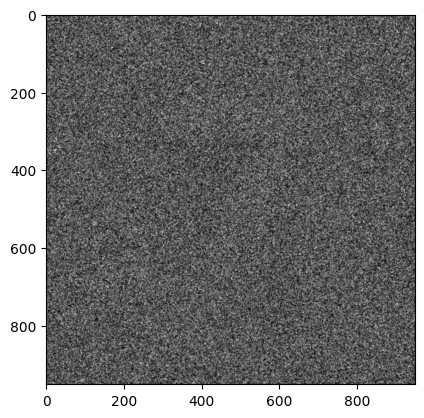

In [7]:
file_path = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
image_path = file_path[2]
image = cv2.imread(image_path, 1)  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

new_image = image
new_image = median_filter(image, 3)
new_image = cv2.GaussianBlur(image, (3,3), 1)
new_image = cv2.blur(image, (3,3))

plt.imshow(new_image, cmap='gray')
plt.show()



In [8]:
def show_image(image, filtered_image):

    plt.figure()
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')
    plt.show()


In [9]:
def histogram_equalization(image, offset=0):
    image_np = np.array(image)  
    histogram, bins = np.histogram(image_np.flatten(), bins=256, range=[0, 256])
    cdf = histogram.cumsum()  
    cdf = cdf / cdf.max()  
    r_max, r_min = 255, 0
    equalized_image_np = np.round(cdf[image_np] * (r_max - r_min)).astype(np.uint8) + offset
    return equalized_image_np
        

In [10]:
def binary(image, threshold=0, inverse=False):
    image_np = np.array(image)  
    r_max = 255
    image_np = np.array([[r_max*(1-inverse) if value > threshold else 
                                    (r_max * (inverse)) for value in i] for i in image_np]).astype(np.uint8)
    return image_np
        

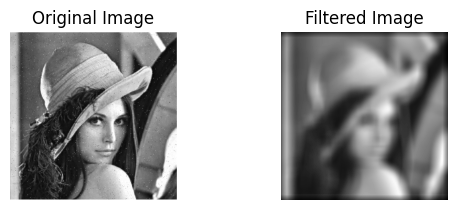

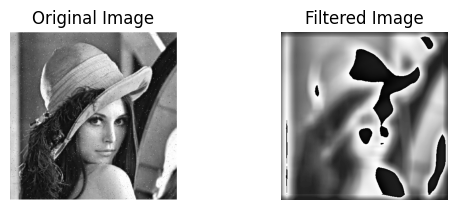

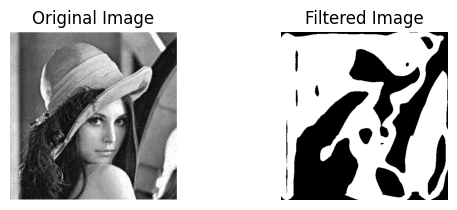

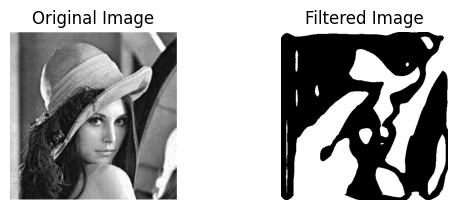

In [174]:

file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
image_path = file_paths[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

filtered_image = image

filtered_image = mean_filter(filtered_image, 30)  
show_image(image, filtered_image)

# filtered_image = histogram_equalization(filtered_image, 30)  
# show_image(image, filtered_image)


filtered_image = binary(filtered_image, 100, False)  
show_image(image, filtered_image)

filtered_image = binary(filtered_image, 100, False)  
show_image(image, filtered_image)


# filtered_image = binary(filtered_image, 100, True)  
# show_image(image, filtered_image)

# filtered_image = median_filter(filtered_image, kernel_size=21)  
# show_image(image, filtered_image)
# print(f"median_filter(filtered_image, kernel_size=21)")


median_filter(filtered_image, kernel_size=21)


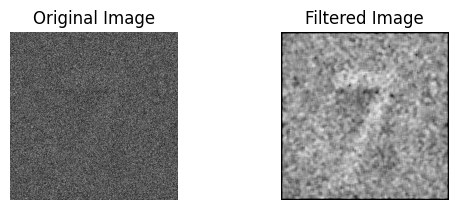

gaussian_filter(filtered_image, kernel_size=31, sigma=20)


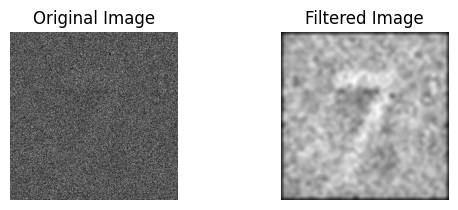

median_filter(filtered_image, kernel_size=21)


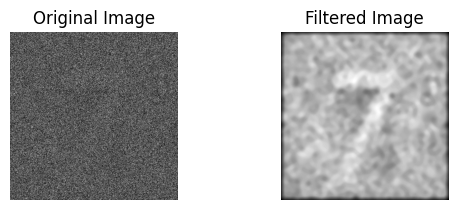

mean_filter(filtered_image, kernel_size=31)


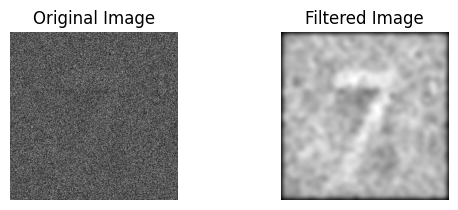

histogram_equalization(filtered_image)


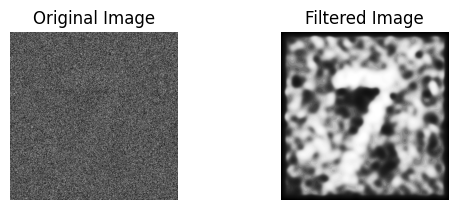

binary(filtered_image, threshold=235, inverse=False)


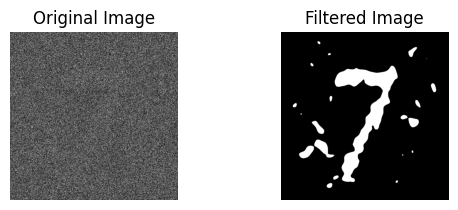

median_filter(filtered_image, kernel_size=41)


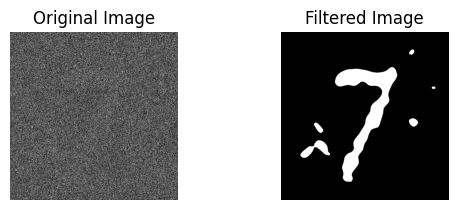

median_filter(filtered_image, kernel_size=65)


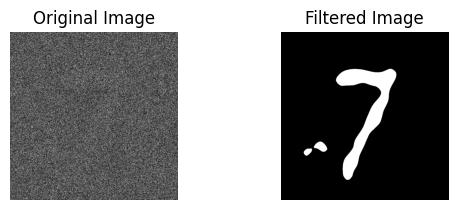

median_filter(filtered_image, kernel_size=77)


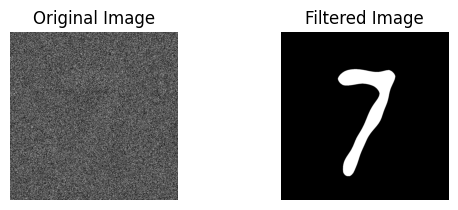

binary(filtered_image, threshold=128, inverse=True)


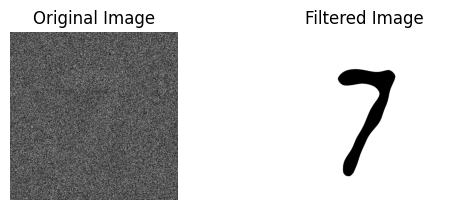

In [17]:
file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
image_path = file_paths[2]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

filtered_image = image

print(f"median_filter(filtered_image, kernel_size=21)")
filtered_image = median_filter(filtered_image, kernel_size=21)  
show_image(image, filtered_image)

print(f"gaussian_filter(filtered_image, kernel_size=31, sigma=20)")
filtered_image = gaussian_filter(filtered_image, kernel_size=31, sigma=20)  
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=21)")
filtered_image = median_filter(filtered_image, kernel_size=21) 
show_image(image, filtered_image)

print(f"mean_filter(filtered_image, kernel_size=31)")
filtered_image = mean_filter(filtered_image, kernel_size=31) 
show_image(image, filtered_image)

print(f"histogram_equalization(filtered_image)")
filtered_image = histogram_equalization(filtered_image, offset=0) 
show_image(image, filtered_image)

print(f"binary(filtered_image, threshold=235, inverse=False)")
filtered_image = binary(filtered_image, threshold=235, inverse=False) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=41)")
filtered_image = median_filter(filtered_image, kernel_size=41) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=65)")
filtered_image = median_filter(filtered_image, kernel_size=65) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=77)")
filtered_image = median_filter(filtered_image, kernel_size=77) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=77)")
filtered_image = median_filter(filtered_image, kernel_size=77) 
show_image(image, filtered_image)

print(f"binary(filtered_image, threshold=128, inverse=True)")
filtered_image = binary(filtered_image, threshold=128, inverse=True) 
show_image(image, filtered_image)


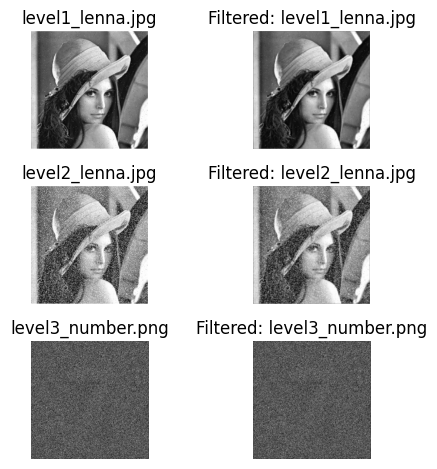

In [25]:
file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']

plt.figure()
rows, columns = len(file_paths), 2
for index, path in enumerate(file_paths):
    image_path = path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    new_image = image
    new_image = mean_filter(new_image, kernel_size=3)  

    plt.subplot(rows, columns, (index*columns)+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{path}')
    plt.axis('off')

    plt.subplot(rows, columns, (index*columns)+2)
    plt.imshow(new_image, cmap='gray')
    plt.title(f'Filtered: {path}')
    plt.axis('off')
    plt.tight_layout()
plt.show()

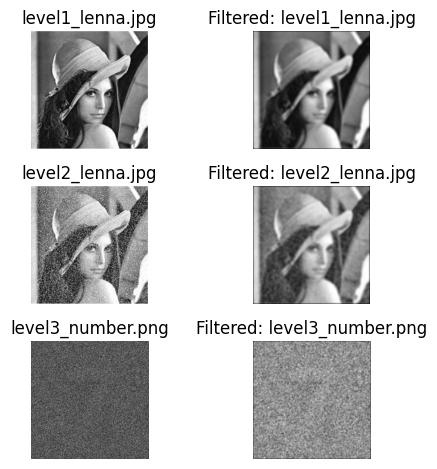

In [26]:

file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']

plt.figure()
rows, columns = len(file_paths), 2
for index, path in enumerate(file_paths):
    image_path = path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    new_image = image
    new_image = mean_filter(new_image, kernel_size=11)  

    plt.subplot(rows, columns, (index*columns)+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{path}')
    plt.axis('off')

    plt.subplot(rows, columns, (index*columns)+2)
    plt.imshow(new_image, cmap='gray')
    plt.title(f'Filtered: {path}')
    plt.axis('off')
    plt.tight_layout()
plt.show()

Median Filter(kernel_size=3)


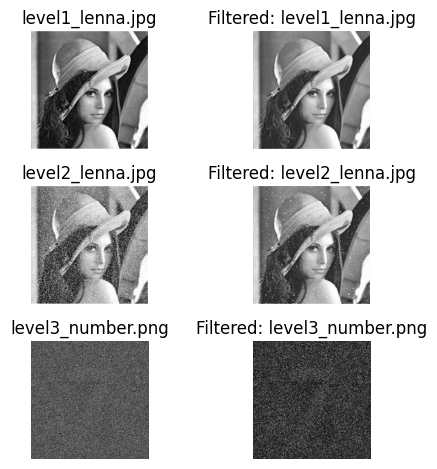

Median Filter(kernel_size=21)


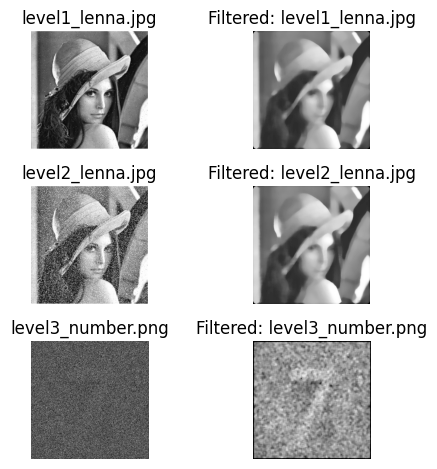

In [32]:
file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
args = [3, 21]

for k_size in args:
    plt.figure()
    print(f"Median Filter(kernel_size={k_size})")
    rows, columns = len(file_paths), 2
    for index, path in enumerate(file_paths):
        image_path = path
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        new_image = image
        new_image = median_filter(new_image, kernel_size=k_size)  

        plt.subplot(rows, columns, (index*columns)+1)
        plt.imshow(image, cmap='gray')
        plt.title(f'{path}')
        plt.axis('off')

        plt.subplot(rows, columns, (index*columns)+2)
        plt.imshow(new_image, cmap='gray')
        plt.title(f'Filtered: {path}')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

Gaussian Filter(kernel_size=3, sigma=1)


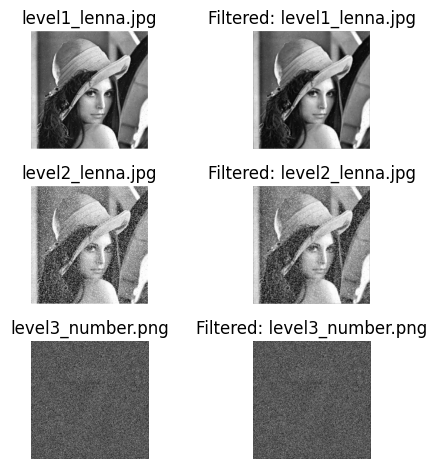

Gaussian Filter(kernel_size=11, sigma=1)


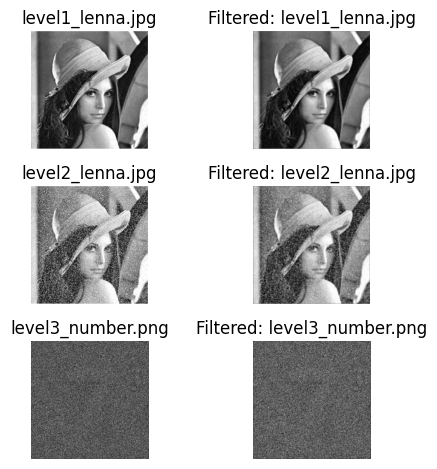

In [31]:

file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
args = [(3, 1), (11, 1)]

for k_size, sigma in args:
    plt.figure()
    print(f"Gaussian Filter(kernel_size={k_size}, sigma={sigma})")
    rows, columns = len(file_paths), 2
    for index, path in enumerate(file_paths):
        image_path = path
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        new_image = image
        new_image = gaussian_filter(new_image, kernel_size=k_size, sigma=sigma)  

        plt.subplot(rows, columns, (index*columns)+1)
        plt.imshow(image, cmap='gray')
        plt.title(f'{path}')
        plt.axis('off')

        plt.subplot(rows, columns, (index*columns)+2)
        plt.imshow(new_image, cmap='gray')
        plt.title(f'Filtered: {path}')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

Gaussian Filter(kernel_size=3, sigma=1)


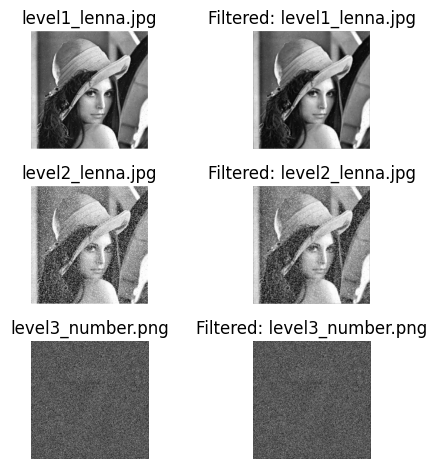

Gaussian Filter(kernel_size=3, sigma=5)


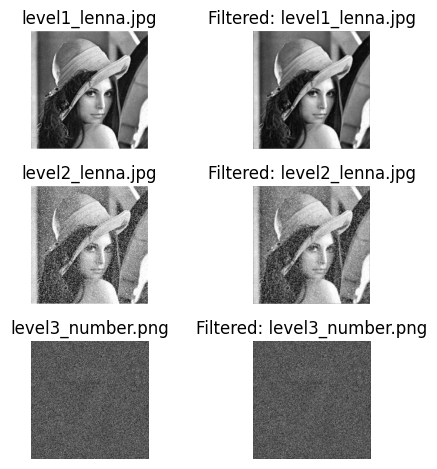

In [33]:


file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
args = [(3, 1), (3, 5)]

for k_size, sigma in args:
    plt.figure()
    print(f"Gaussian Filter(kernel_size={k_size}, sigma={sigma})")
    rows, columns = len(file_paths), 2
    for index, path in enumerate(file_paths):
        image_path = path
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        new_image = image
        new_image = gaussian_filter(new_image, kernel_size=k_size, sigma=sigma)  

        plt.subplot(rows, columns, (index*columns)+1)
        plt.imshow(image, cmap='gray')
        plt.title(f'{path}')
        plt.axis('off')

        plt.subplot(rows, columns, (index*columns)+2)
        plt.imshow(new_image, cmap='gray')
        plt.title(f'Filtered: {path}')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

In [ ]:

file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
args = [3, 21]

for k_size in args:
    plt.figure()
    print(f"Median Filter(kernel_size={k_size})")
    rows, columns = len(file_paths), 2
    for index, path in enumerate(file_paths):
        image_path = path
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        new_image = image
        new_image = median_filter(new_image, kernel_size=k_size)  

        plt.subplot(rows, columns, (index*columns)+1)
        plt.imshow(image, cmap='gray')
        plt.title(f'{path}')
        plt.axis('off')

        plt.subplot(rows, columns, (index*columns)+2)
        plt.imshow(new_image, cmap='gray')
        plt.title(f'Filtered: {path}')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

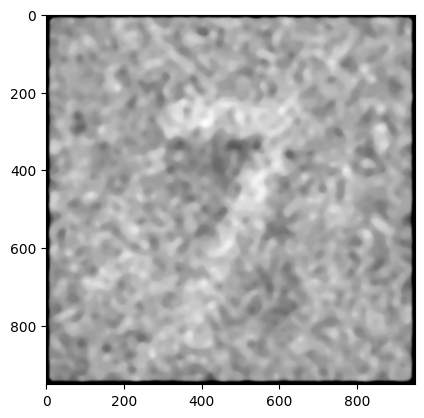

In [50]:

file_path = ['level1_lenna.jpg',
            'level2_lenna.jpg',
            'level3_number.png']

image_path = file_path[2]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

new_image = image
new_image = median_filter(new_image, 23)
new_image = median_filter(new_image, 15)
new_image = median_filter(new_image, 11)
new_image = mean_filter(new_image, 5)
new_image = median_filter(new_image, 5)


plt.imshow(new_image, cmap='gray')
plt.show()

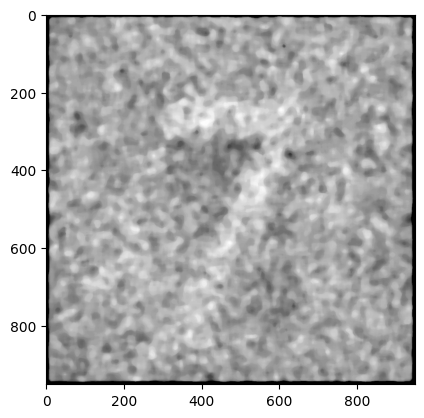

In [48]:
file_path = ['level1_lenna.jpg',
            'level2_lenna.jpg',
            'level3_number.png']

image_path = file_path[2]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

new_image = image
new_image = median_filter(new_image, 21)
new_image = median_filter(new_image, 11)
new_image = median_filter(new_image, 3)

plt.imshow(new_image, cmap='gray')
plt.show()

median_filter(filtered_image, kernel_size=21)


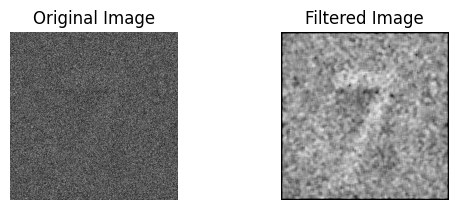

gaussian_filter(filtered_image, kernel_size=31, sigma=20)


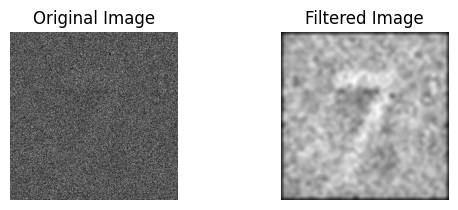

median_filter(filtered_image, kernel_size=21)


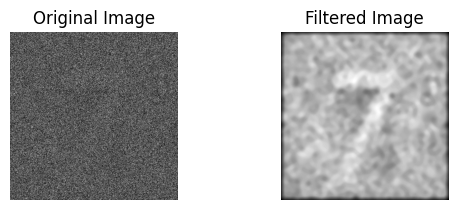

mean_filter(filtered_image, kernel_size=31)


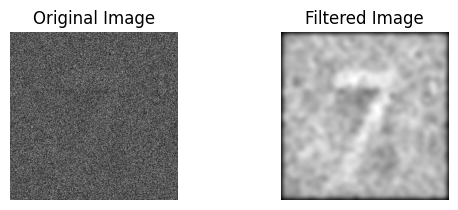

histogram_equalization(filtered_image, offset=35)


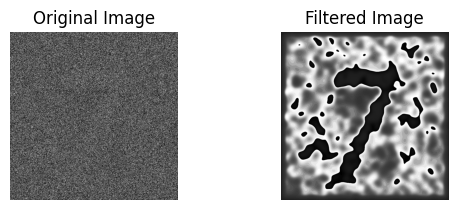

binary(filtered_image, threshold=35, inverse=False)


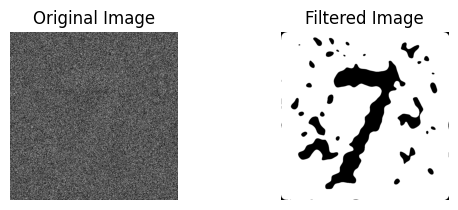

median_filter(filtered_image, kernel_size=71)


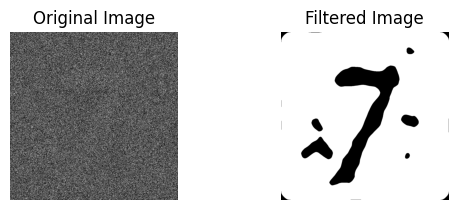

median_filter(filtered_image, kernel_size=77)


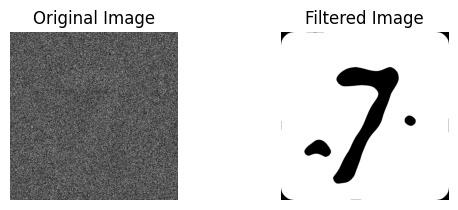

median_filter(filtered_image, kernel_size=83)


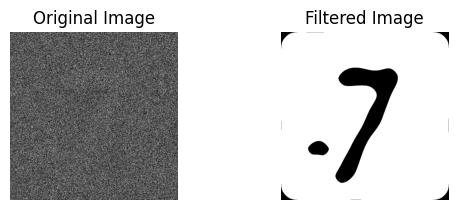

binary(filtered_image, threshold=128, inverse=True)


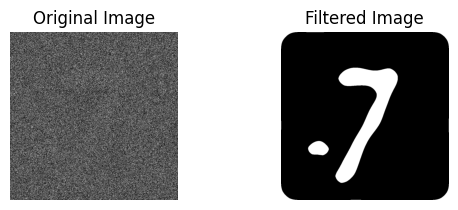

In [168]:

file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
image_path = file_paths[2]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

filtered_image = image

print(f"median_filter(filtered_image, kernel_size=21)")
filtered_image = median_filter(filtered_image, kernel_size=21)  
show_image(image, filtered_image)

print(f"gaussian_filter(filtered_image, kernel_size=31, sigma=20)")
filtered_image = gaussian_filter(filtered_image, kernel_size=31, sigma=20)  
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=21)")
filtered_image = median_filter(filtered_image, kernel_size=21) 
show_image(image, filtered_image)

print(f"mean_filter(filtered_image, kernel_size=31)")
filtered_image = mean_filter(filtered_image, kernel_size=31) 
show_image(image, filtered_image)

print(f"histogram_equalization(filtered_image, offset=35)")
filtered_image = histogram_equalization(filtered_image, offset=35) 
show_image(image, filtered_image)

print(f"binary(filtered_image, threshold=35, inverse=False)")
filtered_image = binary(filtered_image, threshold=35, inverse=False) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=71)")
filtered_image = median_filter(filtered_image, kernel_size=71) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=77)")
filtered_image = median_filter(filtered_image, kernel_size=77) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=83)")
filtered_image = median_filter(filtered_image, kernel_size=83) 
show_image(image, filtered_image)

print(f"binary(filtered_image, threshold=128, inverse=True)")
filtered_image = binary(filtered_image, threshold=128, inverse=True) 
show_image(image, filtered_image)


median_filter(filtered_image, kernel_size=21)


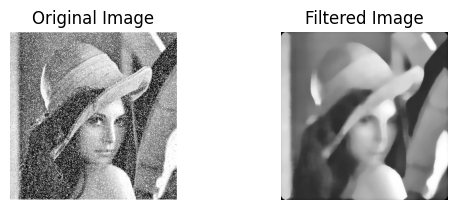

gaussian_filter(filtered_image, kernel_size=31, sigma=20)


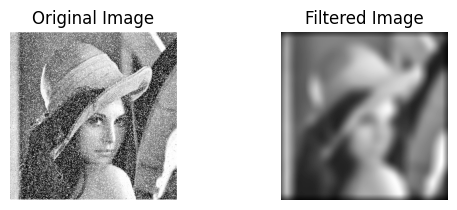

median_filter(filtered_image, kernel_size=21)


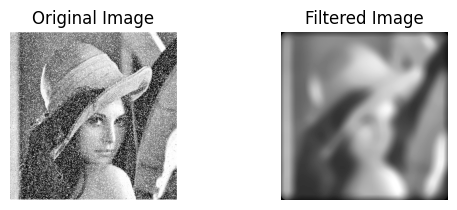

mean_filter(filtered_image, kernel_size=31)


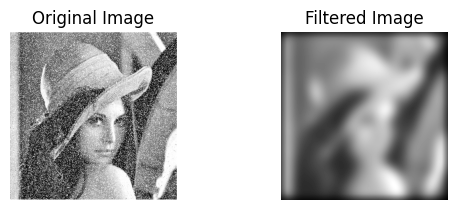

histogram_equalization(filtered_image)


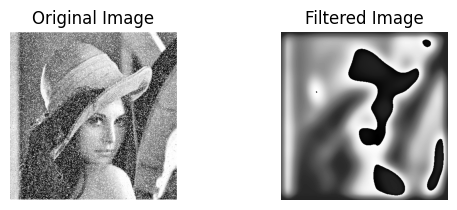

binary(filtered_image, threshold=220, inverse=False)


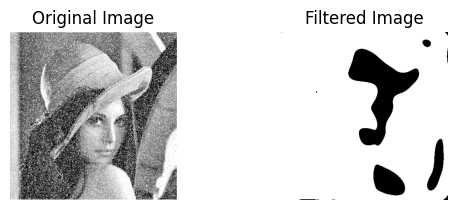

median_filter(filtered_image, kernel_size=71)


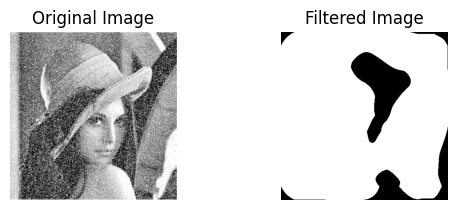

median_filter(filtered_image, kernel_size=71)


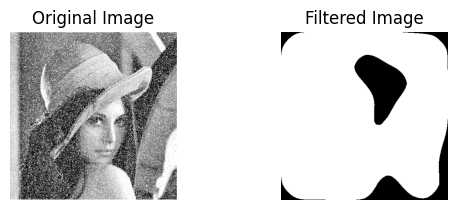

median_filter(filtered_image, kernel_size=71)


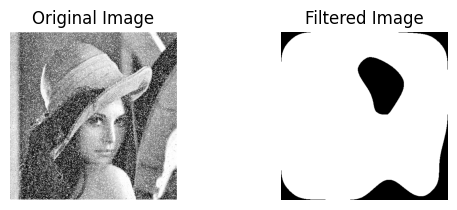

binary(filtered_image, threshold=128, inverse=True)


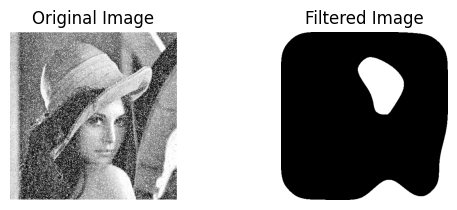

In [162]:


file_paths = ['level1_lenna.jpg', 'level2_lenna.jpg', 'level3_number.png']
image_path = file_paths[1]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

filtered_image = image

print(f"median_filter(filtered_image, kernel_size=21)")
filtered_image = median_filter(filtered_image, kernel_size=21)  
show_image(image, filtered_image)

print(f"gaussian_filter(filtered_image, kernel_size=31, sigma=20)")
filtered_image = gaussian_filter(filtered_image, kernel_size=31, sigma=20)  
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=21)")
filtered_image = median_filter(filtered_image, kernel_size=21) 
show_image(image, filtered_image)

print(f"mean_filter(filtered_image, kernel_size=31)")
filtered_image = mean_filter(filtered_image, kernel_size=31) 
show_image(image, filtered_image)

print(f"histogram_equalization(filtered_image)")
filtered_image = histogram_equalization(filtered_image, offset=35) 
show_image(image, filtered_image)

print(f"binary(filtered_image, threshold=220, inverse=False)")
filtered_image = binary(filtered_image, threshold=35, inverse=False) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=71)")
filtered_image = median_filter(filtered_image, kernel_size=71) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=71)")
filtered_image = median_filter(filtered_image, kernel_size=71) 
show_image(image, filtered_image)

print(f"median_filter(filtered_image, kernel_size=71)")
filtered_image = median_filter(filtered_image, kernel_size=71) 
show_image(image, filtered_image)

print(f"binary(filtered_image, threshold=128, inverse=True)")
filtered_image = binary(filtered_image, threshold=128, inverse=True) 
show_image(image, filtered_image)
